# ROC Curves

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine
from sql_config import protocol, username, password, host, port, database_name

In [2]:
# create db connection and engine
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

### Load Data from PostgreSQL with clean code

In [3]:
df_clean = pd.read_sql_query('select * from si_info.app_data_clean', con=engine)

In [4]:
df_clean.head()

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,...,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,doc_count
0,0,Cash loans,F,N,Y,0,67500.0,157914.0,9193.5,139500.0,...,3.0,1.0,-1380.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0,Cash loans,F,Y,N,0,135000.0,900000.0,26446.5,900000.0,...,0.0,0.0,-1709.0,0.0,0.0,0.0,0.0,0.0,6.0,1
2,0,Revolving loans,F,Y,Y,0,450000.0,855000.0,42750.0,855000.0,...,0.0,0.0,-748.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,Cash loans,F,N,Y,0,157500.0,553806.0,22090.5,495000.0,...,0.0,0.0,-1287.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,Cash loans,F,N,N,0,67500.0,203760.0,20281.5,180000.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1


### Prepare for machine Learning

In [5]:
X = df_clean
X.head()

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,...,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,doc_count
0,0,Cash loans,F,N,Y,0,67500.0,157914.0,9193.5,139500.0,...,3.0,1.0,-1380.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0,Cash loans,F,Y,N,0,135000.0,900000.0,26446.5,900000.0,...,0.0,0.0,-1709.0,0.0,0.0,0.0,0.0,0.0,6.0,1
2,0,Revolving loans,F,Y,Y,0,450000.0,855000.0,42750.0,855000.0,...,0.0,0.0,-748.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,Cash loans,F,N,Y,0,157500.0,553806.0,22090.5,495000.0,...,0.0,0.0,-1287.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,Cash loans,F,N,N,0,67500.0,203760.0,20281.5,180000.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1


### Start model building

In [6]:
# Seperate out the dependent and independent variables
# Split our preprocessed data into our features and target arrays

# this is the target
y = X["target"].values

# Drop y out of the dataframe to get the independent variables
# this is the feature list
X = X.drop("target", axis=1)
independent_variables = X.columns
X.head()

,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,...,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,doc_count
0,Cash loans,F,N,Y,0,67500.0,157914.0,9193.5,139500.0,Unaccompanied,...,3.0,1.0,-1380.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,Cash loans,F,Y,N,0,135000.0,900000.0,26446.5,900000.0,Unaccompanied,...,0.0,0.0,-1709.0,0.0,0.0,0.0,0.0,0.0,6.0,1
2,Revolving loans,F,Y,Y,0,450000.0,855000.0,42750.0,855000.0,"Spouse, partner",...,0.0,0.0,-748.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Cash loans,F,N,Y,0,157500.0,553806.0,22090.5,495000.0,Unaccompanied,...,0.0,0.0,-1287.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Cash loans,F,N,N,0,67500.0,203760.0,20281.5,180000.0,Family,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1


In [7]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity',
       'amt_goods_price', 'region_population_relative', 'days_birth',
       'days_employed', 'days_registration', 'days_id_publish',
       ...
       'wallsmaterial_mode_Block', 'wallsmaterial_mode_Mixed',
       'wallsmaterial_mode_Monolithic', 'wallsmaterial_mode_Others',
       'wallsmaterial_mode_Panel', 'wallsmaterial_mode_Stone, brick',
       'wallsmaterial_mode_Wooden', 'emergencystate_mode_0',
       'emergencystate_mode_No', 'emergencystate_mode_Yes'],
      dtype='object', length=132)


,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,...,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_0,emergencystate_mode_No,emergencystate_mode_Yes
0,0,67500.0,157914.0,9193.5,139500.0,0.035792,-24680,365243,-8365.0,-5033,...,1,0,0,0,0,0,0,0,1,0
1,0,135000.0,900000.0,26446.5,900000.0,0.014520,-18874,-12166,-6758.0,-2424,...,0,0,0,0,1,0,0,0,1,0
2,0,450000.0,855000.0,42750.0,855000.0,0.046220,-12385,-5557,-2320.0,-2789,...,0,1,0,0,0,0,0,0,1,0
3,0,157500.0,553806.0,22090.5,495000.0,0.011657,-20108,-4695,-10304.0,-3543,...,0,0,0,0,1,0,0,0,1,0
4,0,67500.0,203760.0,20281.5,180000.0,0.020246,-21817,365243,-6288.0,-5107,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,2,112500.0,117162.0,11718.0,103500.0,0.010966,-9106,-1031,-9064.0,-1739,...,0,0,0,0,0,1,0,0,1,0
307501,0,157500.0,327024.0,21420.0,270000.0,0.018029,-10960,-1091,-5206.0,-1049,...,0,0,0,0,0,0,0,1,0,0
307502,0,157500.0,900000.0,38263.5,900000.0,0.030755,-19100,-53,-11441.0,-2629,...,0,0,0,0,0,0,0,1,0,0
307503,0,157500.0,557770.5,20164.5,481500.0,0.004960,-12106,-3635,-5316.0,-2438,...,0,0,0,0,0,0,0,0,1,0


### Split

In [9]:
X_dummies.head()

,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,...,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_0,emergencystate_mode_No,emergencystate_mode_Yes
0,0,67500.0,157914.0,9193.5,139500.0,0.035792,-24680,365243,-8365.0,-5033,...,1,0,0,0,0,0,0,0,1,0
1,0,135000.0,900000.0,26446.5,900000.0,0.014520,-18874,-12166,-6758.0,-2424,...,0,0,0,0,1,0,0,0,1,0
2,0,450000.0,855000.0,42750.0,855000.0,0.046220,-12385,-5557,-2320.0,-2789,...,0,1,0,0,0,0,0,0,1,0
3,0,157500.0,553806.0,22090.5,495000.0,0.011657,-20108,-4695,-10304.0,-3543,...,0,0,0,0,1,0,0,0,1,0
4,0,67500.0,203760.0,20281.5,180000.0,0.020246,-21817,365243,-6288.0,-5107,...,0,0,0,0,0,1,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.5, stratify=y, random_state=0)

In [12]:
# Check the number of occurrences per target value in the training data
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the `y_train` array:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique values of the `y_train` array:
[[     0      1]
 [141340  12412]]


In [13]:
# Check the number of occurrences per target value in the testing data
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the `y_test` array:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique values of the `y_test` array:
[[     0      1]
 [141340  12413]]


### Scale

In [14]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [15]:
# Transform the training and testing data by using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Using KNN to Create the ROC Curve

In [16]:
# Import the KNN classifier model from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.857
k: 3, Train/Test Score: 0.929/0.903
k: 5, Train/Test Score: 0.922/0.914
k: 7, Train/Test Score: 0.920/0.917
k: 9, Train/Test Score: 0.920/0.918
k: 11, Train/Test Score: 0.920/0.919
k: 13, Train/Test Score: 0.919/0.919
k: 15, Train/Test Score: 0.919/0.919
k: 17, Train/Test Score: 0.919/0.919
k: 19, Train/Test Score: 0.919/0.919


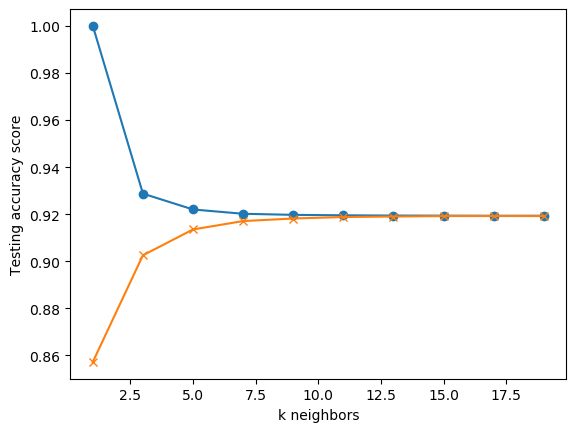

In [17]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [18]:
# Create the KNN model. Note that k: 11 provides the best accuracy 
knn_model = KNeighborsClassifier(n_neighbors=11)

In [19]:
# Train the KNN model
knn_model.fit(X_train_scaled, y_train)
print("k=11 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

k=11 Test Acc: 0.919


In [20]:
# Show the confussion matrix for the KNN model
from sklearn.metrics import confusion_matrix

y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[141245     95]
 [ 12388     25]]


In [21]:
# Print classification report for the KNN model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    141340
           1       0.21      0.00      0.00     12413

    accuracy                           0.92    153753
   macro avg       0.56      0.50      0.48    153753
weighted avg       0.86      0.92      0.88    153753



Instead of a pure binary output, the KNN model also has a `predict_proba()` method, which returns probability estimates for given input. For example, here are the first 10 predictions of the testing set.

In [22]:
knn_model.predict(X_test_scaled[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

And, here are the first 10 probability estimates of the testing set. 

In [23]:
# Note that each pair always adds up to exactly 1
knn_model.predict_proba(X_test_scaled[0:10])

array([[1.        , 0.        ],
       [0.81818182, 0.18181818],
       [0.90909091, 0.09090909],
       [0.63636364, 0.36363636],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.90909091, 0.09090909],
       [0.90909091, 0.09090909],
       [0.90909091, 0.09090909],
       [0.72727273, 0.27272727]])

We're concerned only with the second column. The `predict()` method is setting a cutoff of 0.5. If the predicted probability is  0.5 or greater, it returns 1. Otherwise, it returns 0.

In [24]:
knn_model.predict_proba(X_test_scaled[0:10])[:,1]

array([0.        , 0.18181818, 0.09090909, 0.36363636, 0.        ,
       0.        , 0.09090909, 0.09090909, 0.09090909, 0.27272727])

What if we want to use a different cutoff value? If we increase the cutoff, we increase the rate of false negatives. If we decrease the cutoff, we increase the rate of false positives.

The receiver operating characteristic (ROC) curve helps us visualize this tradeoff. The false positive rate and the true positive rate are calculated for several thresholds, and we plot them against each other.

In [25]:
# Import the roc_curve module from scikit-learn
from sklearn.metrics import roc_curve

In [26]:
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
print(fpr_knn)
print(tpr_knn)
print(thresholds_knn)

[0.00000000e+00 7.07513797e-06 8.49016556e-05 6.72138107e-04
 4.06820433e-03 1.79000991e-02 6.95698316e-02 2.21175888e-01
 5.63796519e-01 1.00000000e+00]
[0.00000000e+00 0.00000000e+00 2.41682107e-04 2.01401756e-03
 1.15201805e-02 4.64835253e-02 1.40981229e-01 3.42463546e-01
 6.83315879e-01 1.00000000e+00]
[1.72727273 0.72727273 0.63636364 0.54545455 0.45454545 0.36363636
 0.27272727 0.18181818 0.09090909 0.        ]


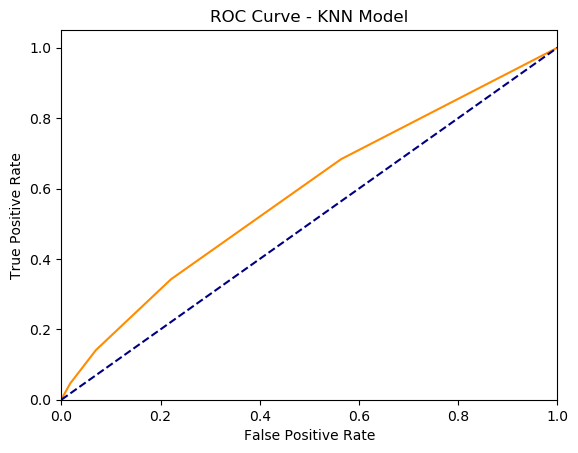

In [27]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

We can also measure the area under the curve (AUC) for another measure of the robustness of the model. An AUC of 0.5 means that the model is no more predictive than random chance. An AUC of 1.0 is as good as a model can theoretically get. (This means that for any chosen cutoff point between 0 and 1, the model is perfectly accurate).

In [28]:
# Import the auc module from scikit-learn
from sklearn.metrics import auc

In [29]:
# Compute the AUC for the KNN model
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the KNN Model: {roc_auc_knn}")

AUC for the KNN Model: 0.584775228458331


## Using Logistic Regression to Create the ROC Curve

In [30]:
# Create a logistic regresion model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)

In [31]:
# Train the logistic regression model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [32]:
# Print the training and testing scores
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.9192465789062907
Testing Data Score: 0.9192471041215456


In [33]:
# Get the probability for each class in the model
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:,1]

In [34]:
# Get the ROC curve data for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

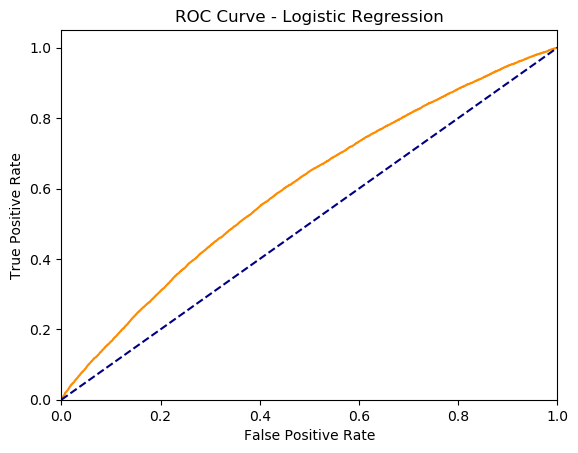

In [35]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [36]:
# Compute AUC for the logistic regression model
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC for the Logistic Regression Model: {roc_auc_lr}")

AUC for the Logistic Regression Model: 0.5998419986550569


In [37]:
# Show the confusion matrix for the logistic regression model
y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[69025 72315]
 [ 4241  8172]]


In [38]:
# Print the classification report for the logistic regression model
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.49      0.64    141340
           1       0.10      0.66      0.18     12413

    accuracy                           0.50    153753
   macro avg       0.52      0.57      0.41    153753
weighted avg       0.87      0.50      0.61    153753

